# Practical 2 -Apriori Algorithm (Association)

## **In Python**

In [ ]:
# @title
!pip install apyori

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/BD_Practicals/P2_Groceries_dataset.csv")

# Data Validation
df['Date'] = pd.to_datetime(df['Date'])

# EDA - Member Shopping Frequency
member_shopping_frequency = df['Member_number'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
sns.histplot(member_shopping_frequency, bins=8, color='skyblue', kde=False)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Members')
plt.title('Member Shopping Frequency')
plt.show()

# Monthly Purchase Counts
monthly_purchase_counts = df['Date'].dt.month.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_purchase_counts.index, y=monthly_purchase_counts.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.title('Monthly Purchase Counts')
plt.show()

# Top 10 Items Frequency
top_items = df['itemDescription'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index, y=top_items.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Items Frequency')
plt.show()

# Data Transformation
#df.drop(columns=['Month'], inplace=True)

# Association Rule Mining using Apriori
transactions_list = df.groupby('Member_number')['itemDescription'].apply(list).tolist()
association_rules = apriori(transactions_list, min_support=0.001, min_confidence=0.05, min_lift=4, min_length=2, max_length=2)
rules_list = list(association_rules)

# Extracting and displaying results
results_df = pd.DataFrame([(tuple(rule[2][0][0]), tuple(rule[2][0][1]), rule[1], rule[2][0][2], rule[2][0][3]) for rule in rules_list],
                           columns=['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'])
print(results_df)


# Practical 3 - K-Mean Algorithm


## **Python**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

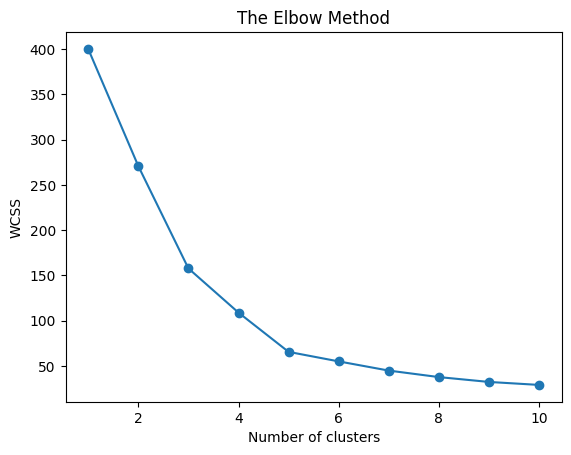

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


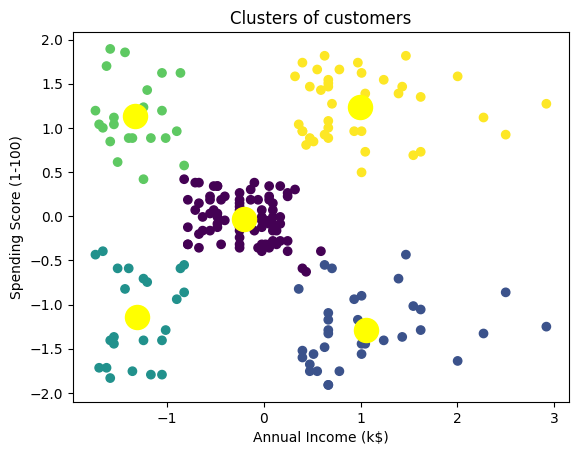

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/BD_Practicals/P3_Mall_Customers.csv")

# Select relevant columns and scale features
X = StandardScaler().fit_transform(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])

# Use the Elbow Method to find the optimal number of clusters
wcss = [KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X).inertia_ for i in range(1, 11)]

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means to the dataset with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## **R**

In [ ]:
# K-Means Clustering

# Importing the dataset
dataset = read.csv("C:\\Users\\chand\\OneDrive\\Documents\\TCSC\\M.sc DS 23-25\\SEM2\\Practical\\BigData\\P3_Mall_Customers.csv")
head(dataset)
dataset = dataset[4:5]
head(dataset)

wcss = vector()
for (i in 1:10) wcss[i] = sum(kmeans(dataset, i)$withinss)
plot(1:10,
     wcss,
     type = 'b',
     main = paste('The Elbow Method'),
     xlab = 'Number of clusters',
     ylab = 'WSS')

kmeans = kmeans(x = dataset, centers = 5)
y_kmeans = kmeans$cluster

# Visualising the clusters
library(cluster)
clusplot(dataset,
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         main = paste('Clusters of customers'),
         xlab = 'Annual Income',
         ylab = 'Spending Score')


#Practical 4 - Linear Regression


## **Python**

Unnamed: 0    0
youtube       0
facebook      0
newspaper     0
sales         0
dtype: int64
Mean Squared Error: 2.834122407884871
Relative Squared Error (RSE): 10.004666291150654
     Actual  Prediction
126    7.92   12.676360
104   24.84   24.015036
99    20.64   20.267082
92    23.28   23.015652
111   26.16   25.143283


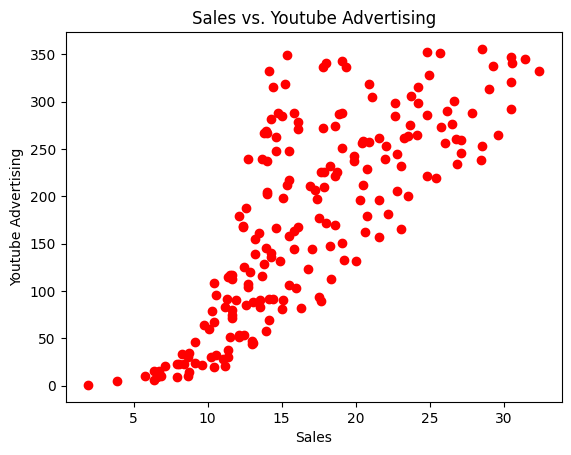

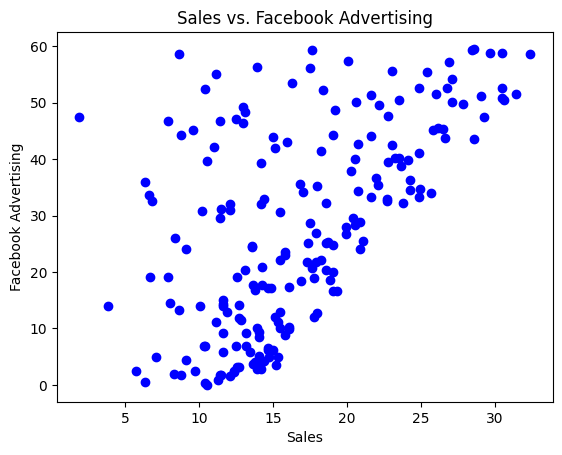

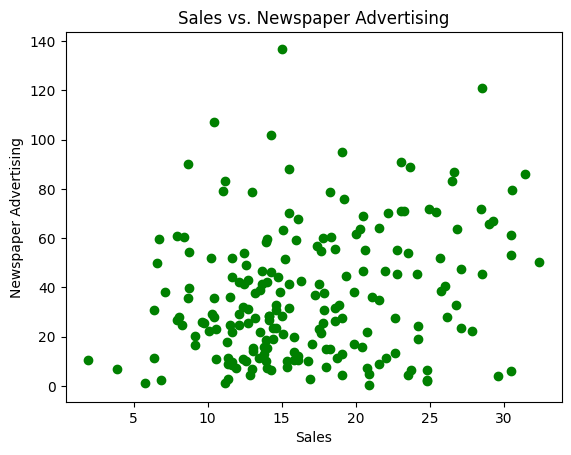

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
marketing = pd.read_csv("/content/drive/MyDrive/BD_Practicals/P4_marketing.csv")

# Checking for missing values
print(marketing.isnull().sum())

# Splitting the data into training and testing sets
X = marketing[['youtube', 'facebook', 'newspaper']]
y = marketing['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Creating the linear regression model and fitting it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
predictions = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating Relative Squared Error (RSE)
RSE = (mse ** 0.5 * 100) / y.mean()
print("Relative Squared Error (RSE):", RSE)

# Creating a DataFrame for actual vs predicted sales
df = pd.DataFrame({'Actual': y_test, 'Prediction': predictions})
print(df.head())

# Plotting sales vs. youtube
plt.scatter(marketing['sales'], marketing['youtube'], color='red')
plt.title('Sales vs. Youtube Advertising')
plt.xlabel('Sales')
plt.ylabel('Youtube Advertising')
plt.show()

# Plotting sales vs. facebook
plt.scatter(marketing['sales'], marketing['facebook'], color='blue')
plt.title('Sales vs. Facebook Advertising')
plt.xlabel('Sales')
plt.ylabel('Facebook Advertising')
plt.show()

# Plotting sales vs. newspaper
plt.scatter(marketing['sales'], marketing['newspaper'], color='green')
plt.title('Sales vs. Newspaper Advertising')
plt.xlabel('Sales')
plt.ylabel('Newspaper Advertising')
plt.show()


##**R**

In [ ]:
install.packages('caTools')
library(caTools)

marketing <- read.csv("C:\\Users\\chand\\OneDrive\\Documents\\TCSC\\M.sc DS 23-25\\SEM2\\Practical\\BigData\\P4_marketing.csv")
ls(marketing)
str(marketing)

colSums(is.na(marketing))
plot(marketing$sales, marketing$youtube, col= rainbow(3))
plot(marketing$sales, marketing$facebook, col= rainbow(3))
plot(marketing$sales, marketing$newspaper, col= rainbow(3))
boxplot(marketing)

set.seed(100)
sample = sample.split(marketing, SplitRatio = 0.75)
train = subset(marketing, sample==TRUE)
head(train)
str(train)
test = subset(marketing, sample==FALSE)
str(test)

#create the model
m1 = lm(sales~youtube+facebook+newspaper, data=train)
summary(m1)
m2 = lm(sales~youtube+facebook, data=train)
summary(m2)

#prediction
pred = predict(m2, test)
summary(pred)
View(pred)
head(pred)
head(test$sales)

df = data.frame(cbind(Actual = test$sales, Prediction = pred))
View(df)
#RSE
(sigma(m2)*100)/mean(marketing$sales)


# Practical 5 - Logistic Regression



##**Python**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
college = pd.read_csv("/content/drive/MyDrive/BD_Practicals/P5_6_studentmarks.csv")

# Splitting the data into training and testing sets
X = college.drop('admit', axis=1)
y = college['admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting test data based on the trained model
y_pred = logistic_model.predict(X_test)

# Changing probabilities
y_pred = (y_pred > 0.5).astype(int)

# Evaluating model accuracy using confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


##**R**

In [ ]:
#install.packages("caTools")    # For Logistic regression
library(caTools)

#fetch the data
college <- read.csv("C:\\Users\\chand\\OneDrive\\Documents\\TCSC\\M.sc DS 23-25\\SEM2\\Practical\\BigData\\P5_6_studentmarks.csv")
head(college)
nrow(college)

split <- sample.split(college, SplitRatio = 0.75)

training_reg <- subset(college, split == "TRUE")
test_reg <- subset(college, split == "FALSE")

# Training model
fit_logistic_model <- glm(admit ~ .,
                      data = training_reg,
                      family = "binomial")

# Predict test data based on model
predict_reg <- predict(fit_logistic_model,
                       test_reg, type = "response")

cdplot(as.factor(admit)~ gpa, data=college)
cdplot(as.factor(admit)~ gre, data=college)
cdplot(as.factor(admit)~ rank, data=college)

# Changing probabilities
predict_reg <- ifelse(predict_reg >0.5, 1, 0)
predict_reg

# Evaluating model accuracy
# using confusion matrix
table(test_reg$admit, predict_reg)



# Practical 6 - Multiple Regression

##**Python**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
StudentData = pd.read_csv("/content/drive/MyDrive/BD_Practicals/P5_6_studentmarks.csv")

# Splitting the data into training and testing sets
split = np.random.rand(len(StudentData)) < 0.75
training_reg = StudentData[split]
test_reg = StudentData[~split]

# Training the multiple linear regression model
X_train = training_reg[['gre', 'gpa', 'rank']]
y_train = training_reg['admit']
X_train = sm.add_constant(X_train) # Adding a constant term to the predictor
model = sm.OLS(y_train, X_train)
fit_MRegressor_model = model.fit()

# Predicting test data based on the model
X_test = test_reg[['gre', 'gpa', 'rank']]
X_test = sm.add_constant(X_test) # Adding a constant term to the predictor
predict_reg = fit_MRegressor_model.predict(X_test)
print(predict_reg)

# You can print the summary of the model to see more details
print(fit_MRegressor_model.summary())


##**R**

In [ ]:
#install.packages("caTools")    # For Logistic regression
library(caTools)

StudentData <- read.csv("C:\\Users\\chand\\OneDrive\\Documents\\TCSC\\M.sc DS 23-25\\SEM2\\Practical\\BigData\\P5_6_studentmarks.csv")
head(StudentData)
nrow(StudentData)

split <- sample.split(StudentData, SplitRatio = 0.75)

training_reg <- subset(StudentData, split == "TRUE")
test_reg <- subset(StudentData, split == "FALSE")

# Training model
fit_MRegressor_model <- lm(formula = admit ~ gre+gpa+rank,
                           data = training_reg)

# Predict test data based on model
predict_reg <- predict(fit_MRegressor_model,
                       newdata = test_reg)

cdplot(as.factor(admit)~ gpa, data=StudentData)
cdplot(as.factor(admit)~ gre, data=StudentData)
cdplot(as.factor(admit)~ rank, data=StudentData)


# Practical 7 - Decision Tree

##**Python**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

a = load_iris()
x = a.data
y = a.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
print(accuracy)

plt.figure(figsize=(10,10))
plot_tree(model, feature_names=a.feature_names,class_names = a.target_names,filled=True)
plt.show()


# Practical 8 - Text Analysis in R Programming

##**R**

In [ ]:
dataset_original = read.delim('/content/drive/MyDrive/BD_Practicals/P8_restaurantreviews.tsv', quote = '', stringsAsFactors = FALSE)
install.packages('tm')
install.packages('SnowballC')
library(tm)
library(SnowballC)
corpus = VCorpus(VectorSource(dataset_original$Review))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords())
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)
dtm =  DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
dataset = as.data.frame(as.matrix(dtm))
dataset$Liked = dataset_original$Liked
print(dataset$Liked)
dataset$Liked = factor(dataset$Liked, levels = c(0,1))
install.packages(caTools)
library(caTools)
set.seed(123)
split = sample.split(dataset$Liked, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)
install.packages('randomForest')
library(randomForest)
classifier = randomForest(x = training_set[-692],
                          y = training_set$Liked,
                          ntree = 10)
y_pred = predict(classifier, newdata = test_set[-692])
cm = table(test_set[,692], y_pred)
print(cm)

# Practical 10 - Time Series Analysis

## **Python**

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sun, 07 Apr 2024   AIC                          48483.625
Time:                        07:31:15   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

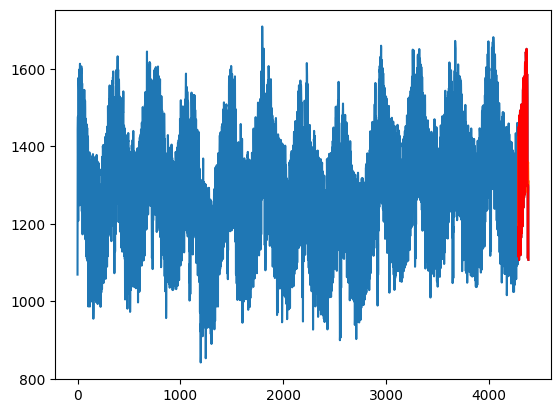

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df['Consumption'].plot()

train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
plt.plot(pred)
plt.plot(test_data, color='red')
plt.show()


#END
----

